In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
%matplotlib inline

import os
print(os.listdir("../input"))

['boston_housing.csv']


In [3]:
data = pd.read_csv('../input/boston_housing.csv')

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null float64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [8]:
df_scaled = pd.DataFrame(preprocessing.scale(data), columns=data.columns)
df_scaled.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [9]:
df_scaled.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.978968e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16,-4.247810e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


<Figure size 3600x3600 with 0 Axes>

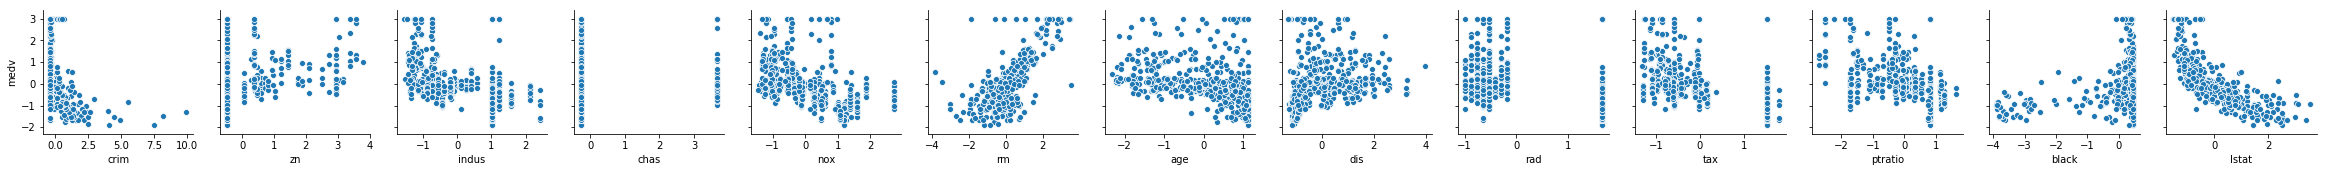

In [10]:
plt.figure(figsize=(50,50))
sns.pairplot(df_scaled,y_vars='medv',x_vars=df_scaled.columns[:-1])

<Figure size 3600x3600 with 0 Axes>

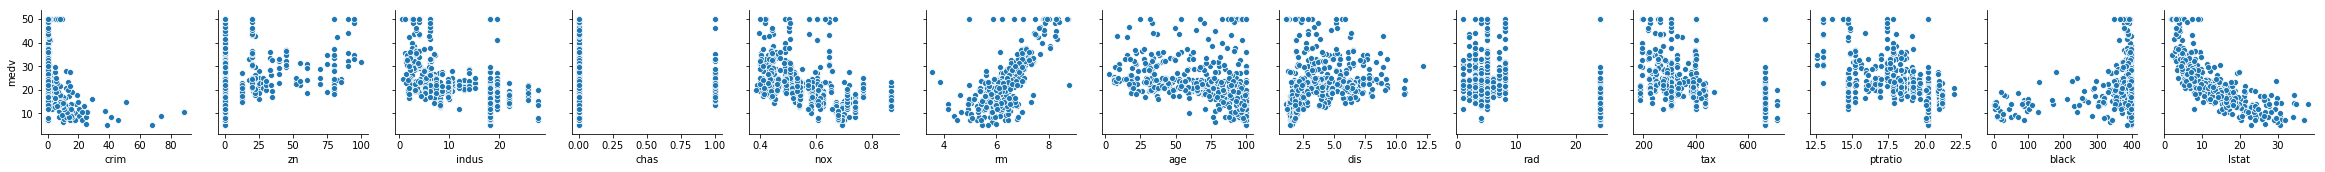

In [11]:
plt.figure(figsize=(50,50))
sns.pairplot(data,y_vars='medv',x_vars=data.columns[:-1])

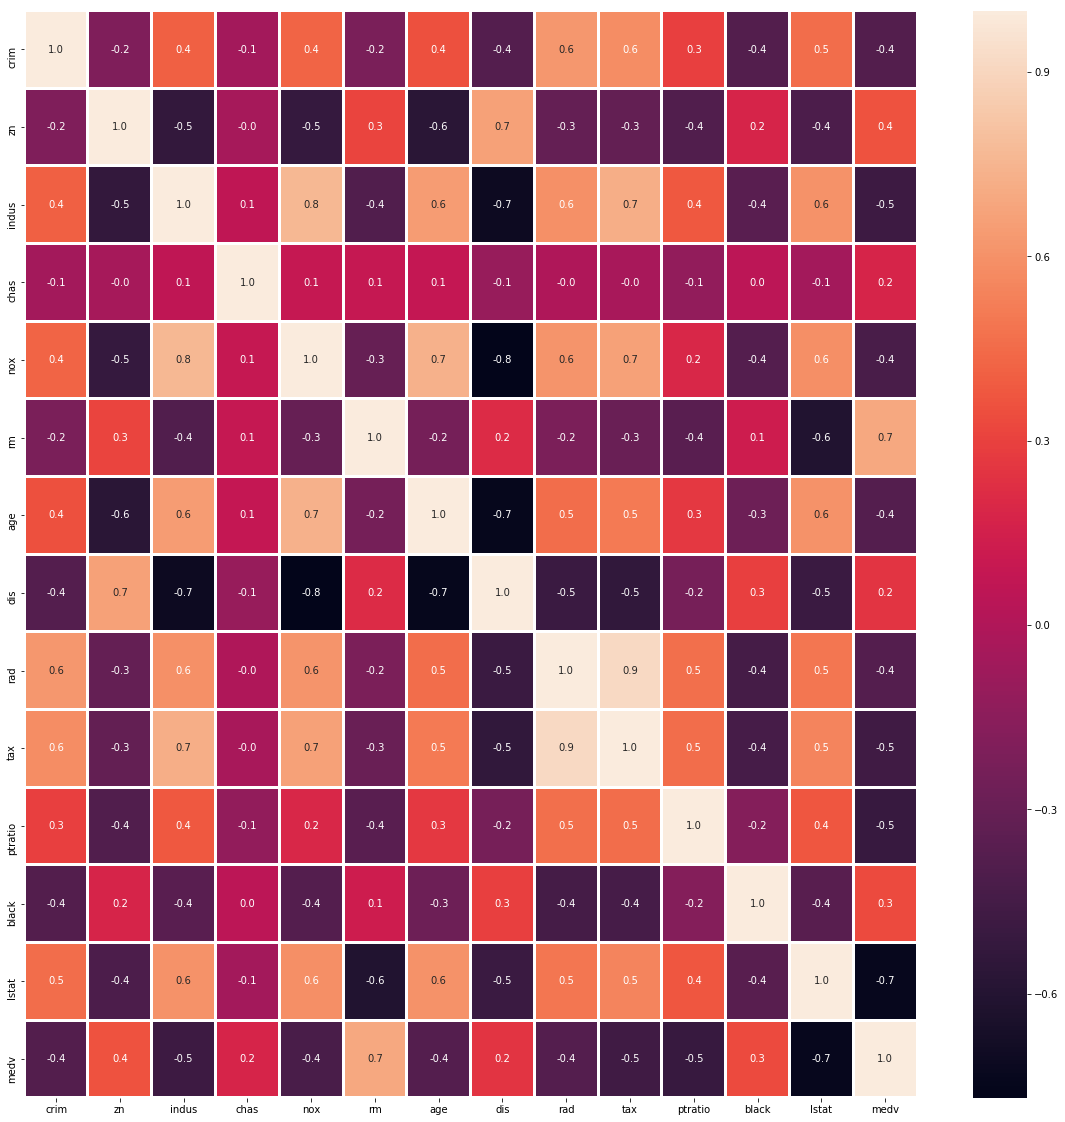

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df_scaled.corr(),annot=True,fmt='.1f',linewidths=2)

In [13]:
X = df_scaled.drop('medv',axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)
linpred = linmodel.predict(X_test)

Text(0, 0.5, 'Predicted Y')

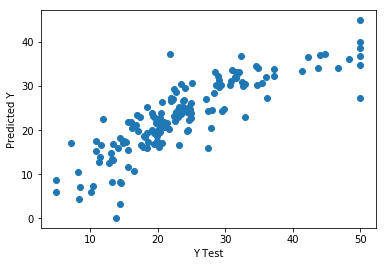

In [15]:
plt.scatter(y_test,linpred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, linpred))
print('MSE:', metrics.mean_squared_error(y_test, linpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linpred)))

MAE: 3.8356963614189366
MSE: 28.547585271468154
RMSE: 5.342994036256091


In [17]:
from sklearn.linear_model import Lasso
alpha_ridge = [-3,-2,-1,1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_mae = {}
temp_mse = {}
temp_rmse = {}
for i in alpha_ridge:
    lasso_reg = Lasso(alpha=i, normalize=True) 
    lasso_reg.fit(X_train, y_train)
    lasso_pred = lasso_reg.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, lasso_pred)
    mse = metrics.mean_squared_error(y_test, lasso_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, lasso_pred))
    temp_mae[i] = mae
    temp_mse[i] = mse
    temp_rmse[i] = rmse

In [19]:
print(temp_mae)
print(temp_mse)
print(temp_rmse)


{-3: 359.8809729968372, -2: 239.64031029281048, -1: 102.83735228370925, 1e-15: 3.835696361418922, 1e-10: 3.835696360185264, 1e-08: 3.835696238916375, 0.0001: 3.834485297077957, 0.001: 3.8259117215140233, 0.01: 3.923829701047095, 1: 7.464072256913471, 1.5: 7.464072256913471, 2: 7.464072256913471, 3: 7.464072256913471, 4: 7.464072256913471, 5: 7.464072256913471, 10: 7.464072256913471, 20: 7.464072256913471, 30: 7.464072256913471, 40: 7.464072256913471}
{-3: 228573.3793899912, -2: 101418.95592779864, -1: 19241.62163595718, 1e-15: 28.547585271468172, 1e-10: 28.54758527702473, 1e-08: 28.54758583385522, 0.0001: 28.55339282141737, 0.001: 28.61835253979898, 0.01: 30.606467051251325, 1: 102.68560123796517, 1.5: 102.68560123796517, 2: 102.68560123796517, 3: 102.68560123796517, 4: 102.68560123796517, 5: 102.68560123796517, 10: 102.68560123796517, 20: 102.68560123796517, 30: 102.68560123796517, 40: 102.68560123796517}
{-3: 478.0934839442922, -2: 318.4634294982685, -1: 138.71417244087635, 1e-15: 5.

In [20]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100)
forest_fit = forest_reg.fit(X_train,y_train)
forest_pred = forest_fit.predict(X_test)

Text(0, 0.5, 'Predicted Y by Random Forest Regression')

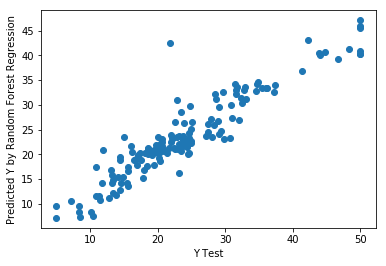

In [23]:
plt.scatter(y_test,forest_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y by Random Forest Regression')

Text(0, 0.5, 'Predicted Y by Linear Regression')

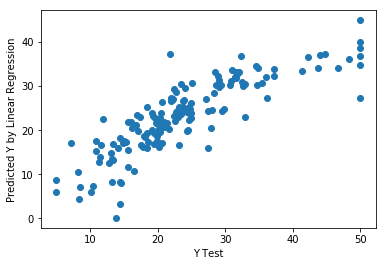

In [24]:
plt.scatter(y_test,linpred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y by Linear Regression')

In [25]:
print('Linear Regression metrics')
print('MAE:', metrics.mean_absolute_error(y_test, linpred))
print('MSE:', metrics.mean_squared_error(y_test, linpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linpred)))
print('')
print('Random Forest Regression metrics')
print('MAE:', metrics.mean_absolute_error(y_test, forest_pred))
print('MSE:', metrics.mean_squared_error(y_test, forest_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, forest_pred)))

Linear Regression metrics
MAE: 3.8356963614189366
MSE: 28.547585271468154
RMSE: 5.342994036256091

Random Forest Regression metrics
MAE: 2.619039473684209
MSE: 13.419639171052628
RMSE: 3.663282567732474
